In [2]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Resize all GEI images to this shape
IMAGE_SIZE = (88, 128)


In [19]:
from PIL import Image
image_path = r'GEI/GEI/015-00/00001.png'
image = Image.open(image_path)


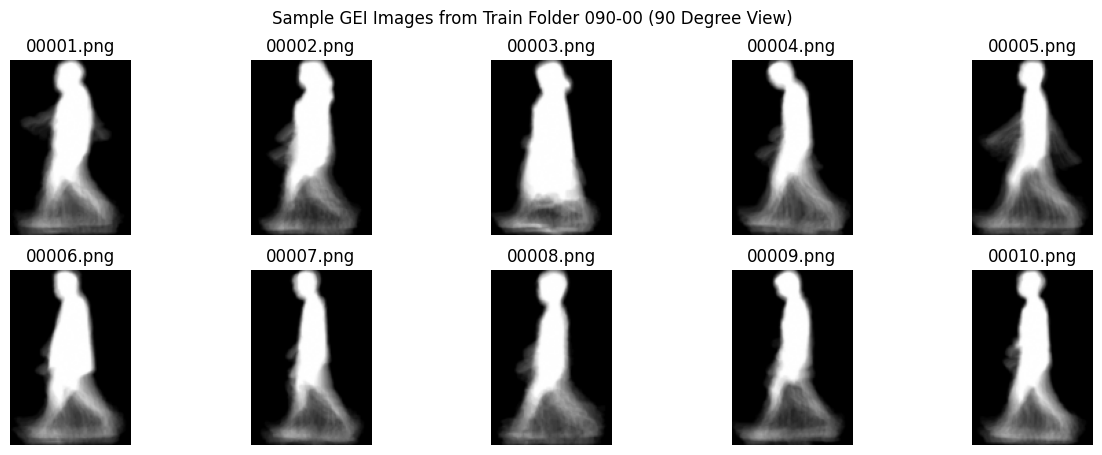

In [24]:
import os
from PIL import Image
import matplotlib.pyplot as plt

train_folder_90 = r'D:\vit study\Machine Learning\Gait\GEI\GEI\090-00'

def plot_sample_images(folder_path, num_images=10):
    image_files = [f'{str(i).zfill(5)}.png' for i in range(1, num_images+1)]
    plt.figure(figsize=(15, 5))
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        plt.subplot(2, 5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(img_file)
        plt.axis('off')
    plt.suptitle('Sample GEI Images from Train Folder 090-00 (90 Degree View)')
    plt.show()

plot_sample_images(train_folder_90)


In [25]:
import numpy as np
from PIL import Image
import os

def analyze_images(folder_path, num_images=10):
    image_files = [f'{str(i).zfill(5)}.png' for i in range(1, num_images + 1)]
    for img_file in image_files:
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        img_array = np.array(img)
        print(f'{img_file} - Shape: {img_array.shape}, Mode: {img.mode}, Min: {img_array.min()}, Max: {img_array.max()}, Mean: {img_array.mean():.2f}')

analyze_images(r'D:\vit study\Machine Learning\Gait\GEI\GEI\090-00', 10)


00001.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 71.46
00002.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 68.31
00003.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 82.11
00004.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 62.52
00005.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 61.13
00006.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 71.86
00007.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 55.47
00008.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 62.39
00009.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 55.41
00010.png - Shape: (128, 88), Mode: L, Min: 0, Max: 255, Mean: 61.28


In [28]:
import os

def count_images_per_folder(root_path, suffix):
    folders = sorted([f for f in os.listdir(root_path) if f.endswith(suffix)])
    counts = {}
    total = 0
    for folder in folders:
        folder_path = os.path.join(root_path, folder)
        n = len([f for f in os.listdir(folder_path) if f.endswith('.png')])
        counts[folder] = n
        total += n
    return counts, total

gei_root = r'D:\vit study\Machine Learning\Gait\GEI\GEI'
train_counts, train_total = count_images_per_folder(gei_root, '-00')
test_counts, test_total   = count_images_per_folder(gei_root, '-01')

print('Train folders and image counts:')
for k, v in train_counts.items():
    print(f'  {k}: {v}')
print(f'Total train images: {train_total}\n')

print('Test folders and image counts:')
for k, v in test_counts.items():
    print(f'  {k}: {v}')
print(f'Total test images: {test_total}')


Train folders and image counts:
  000-00: 8763
  015-00: 9194
  030-00: 9915
  045-00: 9812
  060-00: 9205
  075-00: 9987
  090-00: 9950
  180-00: 8874
  195-00: 9461
  210-00: 10030
  225-00: 9781
  240-00: 9169
  255-00: 10037
  270-00: 9871
Total train images: 134049

Test folders and image counts:
  000-01: 8704
  015-01: 9149
  030-01: 9895
  045-01: 9854
  060-01: 9150
  075-01: 9956
  090-01: 9923
  180-01: 8804
  195-01: 9352
  210-01: 9970
  225-01: 9786
  240-01: 9110
  255-01: 9925
  270-01: 9759
Total test images: 133337


In [30]:
import os

folder_90_train = r'D:\vit study\Machine Learning\Gait\GEI\GEI\090-00'
num_images = len([f for f in os.listdir(folder_90_train) if f.endswith('.png')])
print(f'Number of images in 90-degree train folder: {num_images}')


Number of images in 90-degree train folder: 9950


In [31]:
from PIL import Image
import os

folder_90_train = r'D:\vit study\Machine Learning\Gait\GEI\GEI\090-00'
sample_image_path = os.path.join(folder_90_train, '00001.png')

img = Image.open(sample_image_path)
print(f'Image size (width, height): {img.size}')
print(f'Image mode: {img.mode}')


Image size (width, height): (88, 128)
Image mode: L


In [14]:
def load_dataset(root_dir):
    images, labels = [], []
    # Here subject id is inferred from image filename (first 5 digits)
    for fname in os.listdir(root_dir):
        if not fname.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        img_path = os.path.join(root_dir, fname)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, IMAGE_SIZE)
        img = img.astype('float32') / 255.0
        images.append(img)
        # Extract subject ID from filename, e.g. '00001.png' → '00001'
        subject_id = fname.split('.')[0]
        labels.append(subject_id)
    X = np.expand_dims(np.array(images), axis=-1)  # shape: (N,88,128,1)
    le = LabelEncoder()
    y_int = le.fit_transform(labels)
    y = to_categorical(y_int, num_classes=len(le.classes_))
    return X, y, le.classes_


Train directory: D:/vit study/Machine Learning/Gait/GEI/GEI/090-00
Test directory: D:/vit study/Machine Learning/Gait/GEI/GEI/090-01
Number of training samples: 9950
Number of testing samples: 9923
Image shape: (128, 88, 1)
Number of classes: 9950


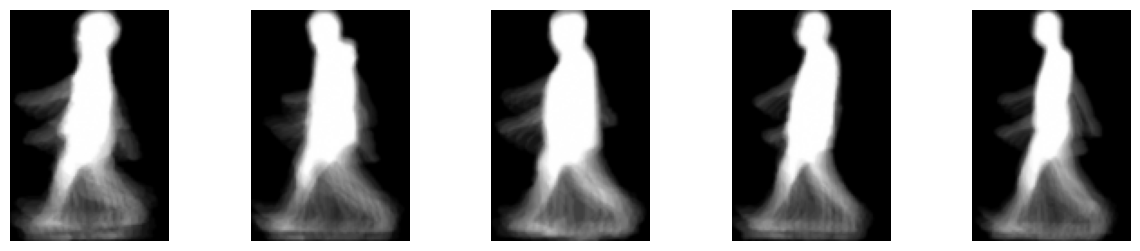

In [45]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Assuming load_dataset is defined and loads image data and labels

GEI_ROOT = r'D:/vit study/Machine Learning/Gait/GEI/GEI/'
train_dir = os.path.join(GEI_ROOT, "090-00")
test_dir = os.path.join(GEI_ROOT, "090-01")

print("Train directory:", train_dir)
print("Test directory:", test_dir)

# Load dataset
X_train, y_train, classes = load_dataset(train_dir)
X_test, y_test, _ = load_dataset(test_dir)

# Data insights
print("Number of training samples:", X_train.shape[0])
print("Number of testing samples:", X_test.shape[0])
print("Image shape:", X_train.shape[1:])
print("Number of classes:", len(classes))

# Display sample images with labels from training dataset
num_samples_to_show = 5
indices = np.random.choice(len(X_train), num_samples_to_show, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(indices):
    plt.subplot(1, num_samples_to_show, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
   
    plt.axis('off')

plt.show()


In [48]:
import os

def find_missing_images(directory):
    files = sorted(os.listdir(directory))
    # Filter only '.png' files with expected naming pattern
    png_files = [f for f in files if f.endswith('.png')]
    
    # Extract numeric parts (without extension)
    numbers = [int(f.split('.')[0]) for f in png_files]
    
    min_num, max_num = min(numbers), max(numbers)
    full_set = set(range(min_num, max_num + 1))
    present_set = set(numbers)
    
    missing_numbers = sorted(full_set - present_set)
    missing_files = [f"{num:05d}.png" for num in missing_numbers]
    
    print(f"Total number of images found: {len(png_files)}")
    print(f"Image index range: {min_num} to {max_num}")
    print(f"Number of missing images: {len(missing_files)}")
    print(f"Some missing files: {missing_files[:10]}")
    
    return missing_files

# Use on your directories
train_dir = r'D:/vit study/Machine Learning/Gait/GEI/GEI/090-00'
test_dir = r'D:/vit study/Machine Learning/Gait/GEI/GEI/090-01'

missing_train = find_missing_images(train_dir)
missing_test = find_missing_images(test_dir)


Total number of images found: 9950
Image index range: 1 to 10306
Number of missing images: 356
Some missing files: ['00016.png', '00164.png', '00179.png', '00184.png', '00303.png', '00345.png', '00376.png', '00382.png', '00385.png', '00390.png']
Total number of images found: 9923
Image index range: 1 to 10306
Number of missing images: 383
Some missing files: ['00028.png', '00127.png', '00141.png', '00157.png', '00166.png', '00167.png', '00173.png', '00179.png', '00238.png', '00257.png']


In [50]:
import os

def get_filenames_sorted(directory):
    filenames = [f for f in os.listdir(directory) if f.endswith('.png')]
    filenames.sort()  # sort by filename, e.g. 00001.png, 00002.png, ...
    return filenames

train_dir = r'D:/vit study/Machine Learning/Gait/GEI/GEI/090-00'
test_dir = r'D:/vit study/Machine Learning/Gait/GEI/GEI/090-01'

train_filenames = get_filenames_sorted(train_dir)
test_filenames = get_filenames_sorted(test_dir)


In [53]:
# Function to find missing images as shared before
def find_missing_images(directory):
    files = sorted(f for f in os.listdir(directory) if f.endswith('.png'))
    numbers = [int(f.split('.')[0]) for f in files]
    min_num, max_num = min(numbers), max(numbers)
    full_set = set(range(min_num, max_num + 1))
    present_set = set(numbers)
    missing_numbers = sorted(full_set - present_set)
    missing_files = [f"{num:05d}.png" for num in missing_numbers]
    return missing_files

# Find missing files separately for train and test dirs
train_dir = r'D:/vit study/Machine Learning/Gait/GEI/GEI/090-00'
test_dir = r'D:/vit study/Machine Learning/Gait/GEI/GEI/090-01'

missing_train = find_missing_images(train_dir)
missing_test = find_missing_images(test_dir)

# Combine missing files lists (to remove from both datasets)
missing_files = set(missing_train).union(set(missing_test))
missing_files = list(missing_files)  # convert back to list


In [54]:
import numpy as np

def filter_missing_images_from_both(X_train, y_train, train_filenames,
                                    X_test, y_test, test_filenames,
                                    missing_files):
    # Combine missing files into a set for fast lookup
    missing_set = set(missing_files)

    # For train dataset: keep only samples whose filenames are not in missing set
    train_mask = np.array([fname not in missing_set for fname in train_filenames])
    X_train_filtered = X_train[train_mask]
    y_train_filtered = y_train[train_mask]
    train_filenames_filtered = [fname for fname in train_filenames if fname not in missing_set]

    # For test dataset: keep only samples whose filenames are not in missing set
    test_mask = np.array([fname not in missing_set for fname in test_filenames])
    X_test_filtered = X_test[test_mask]
    y_test_filtered = y_test[test_mask]
    test_filenames_filtered = [fname for fname in test_filenames if fname not in missing_set]

    return (X_train_filtered, y_train_filtered, train_filenames_filtered,
            X_test_filtered, y_test_filtered, test_filenames_filtered)

# Usage example (assuming X_train, y_train, train_filenames, X_test, y_test, test_filenames, and missing_files are defined)
X_train, y_train, train_filenames, X_test, y_test, test_filenames = filter_missing_images_from_both(
    X_train, y_train, train_filenames,
    X_test, y_test, test_filenames,
    missing_files
)


In [57]:
# Convert missing_files to set for faster lookup
missing_set = set(missing_files)

# Check for any missing filenames in train and test datasets after filtering
missing_in_train = [fname for fname in train_filenames if fname in missing_set]
missing_in_test = [fname for fname in test_filenames if fname in missing_set]

print(f"Missing images still in training data: {len(missing_in_train)}")
if missing_in_train:
    print("Sample missing train filenames:", missing_in_train[:10])

print(f"Missing images still in testing data: {len(missing_in_test)}")
if missing_in_test:
    print("Sample missing test filenames:", missing_in_test[:10])

# If counts are zero, no missing images remain in datasets


Missing images still in training data: 0
Missing images still in testing data: 0


In [63]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(88, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(9923
                 , activation='softmax')  # Adjust output units per your classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assume X_train, y_train, X_val, y_val are your prepared datasets
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))


Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 9950), output.shape=(None, 9923)